In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import polars as pol
import seaborn as sns
import joblib

In [2]:
df = pd.read_csv('churn.csv')

### CHECK MISSING DATA

In [3]:
percentage_missing = df.isnull().sum()/len(df) * 100
percentage_missing

enrollee_id                0.000000
city                       0.000000
city_development_index     0.000000
gender                    23.530640
relevent_experience        0.000000
enrolled_university        2.014824
education_level            2.401086
major_discipline          14.683161
experience                 0.339284
company_size              30.994885
company_type              32.049274
last_new_job               2.207955
training_hours             0.000000
target                     0.000000
dtype: float64

In [4]:
to_drop = percentage_missing[percentage_missing>14].keys()
not_to_drop = percentage_missing[percentage_missing<14].keys()
to_drop

Index(['gender', 'major_discipline', 'company_size', 'company_type'], dtype='object')

In [5]:
df_new = df[not_to_drop]
df_new_dropped_na = df_new.dropna(axis=0)
df_new_dropped_na

,enrollee_id,city,city_development_index,relevent_experience,enrolled_university,education_level,experience,last_new_job,training_hours,target
0,8949,city_103,0.920,Has relevent experience,no_enrollment,Graduate,>20,1,36,1.0
1,29725,city_40,0.776,No relevent experience,no_enrollment,Graduate,15,>4,47,0.0
2,11561,city_21,0.624,No relevent experience,Full time course,Graduate,5,never,83,0.0
4,666,city_162,0.767,Has relevent experience,no_enrollment,Masters,>20,4,8,0.0
5,21651,city_176,0.764,Has relevent experience,Part time course,Graduate,11,1,24,1.0
...,...,...,...,...,...,...,...,...,...,...
19153,7386,city_173,0.878,No relevent experience,no_enrollment,Graduate,14,1,42,1.0
19154,31398,city_103,0.920,Has relevent experience,no_enrollment,Graduate,14,4,52,1.0
19155,24576,city_103,0.920,Has relevent experience,no_enrollment,Graduate,>20,4,44,0.0
19156,5756,city_65,0.802,Has relevent experience,no_enrollment,High School,<1,2,97,0.0


In [6]:
df = df_new_dropped_na

### SEPARATION BETWEEN NUMERICAL AND CATEGORICAL DATA

In [7]:
list_numerical = []
list_categorical = []
for i in range(0, len(df.keys())):
    if df[df.columns[i]].dtype == 'int64' or df[df.columns[i]].dtype == 'float64':
        list_numerical.append(df.columns[i])
    else:
        list_categorical.append(df.columns[i])
list_numerical.pop(0)

'enrollee_id'

In [8]:
df_numerical = df[list_numerical]
df_categorical = df[list_categorical]
df_numerical

,city_development_index,training_hours,target
0,0.920,36,1.0
1,0.776,47,0.0
2,0.624,83,0.0
4,0.767,8,0.0
5,0.764,24,1.0
...,...,...,...
19153,0.878,42,1.0
19154,0.920,52,1.0
19155,0.920,44,0.0
19156,0.802,97,0.0


### OUTLIER REMOVAL

In [9]:
#Chebyshev's Theorem:
mean_th = df_numerical['training_hours'].mean()
std_th = df_numerical['training_hours'].std()
df_numerical[df_numerical['training_hours']>mean_th + 3*std_th].shape
df_out_removed = df[df_numerical['training_hours']<mean_th + 3*std_th]
df_out_removed

,enrollee_id,city,city_development_index,relevent_experience,enrolled_university,education_level,experience,last_new_job,training_hours,target
0,8949,city_103,0.920,Has relevent experience,no_enrollment,Graduate,>20,1,36,1.0
1,29725,city_40,0.776,No relevent experience,no_enrollment,Graduate,15,>4,47,0.0
2,11561,city_21,0.624,No relevent experience,Full time course,Graduate,5,never,83,0.0
4,666,city_162,0.767,Has relevent experience,no_enrollment,Masters,>20,4,8,0.0
5,21651,city_176,0.764,Has relevent experience,Part time course,Graduate,11,1,24,1.0
...,...,...,...,...,...,...,...,...,...,...
19153,7386,city_173,0.878,No relevent experience,no_enrollment,Graduate,14,1,42,1.0
19154,31398,city_103,0.920,Has relevent experience,no_enrollment,Graduate,14,4,52,1.0
19155,24576,city_103,0.920,Has relevent experience,no_enrollment,Graduate,>20,4,44,0.0
19156,5756,city_65,0.802,Has relevent experience,no_enrollment,High School,<1,2,97,0.0


In [10]:
#Chebyshev's Theorem:
mean_ci = df_numerical['city_development_index'].mean()
std_ci = df_numerical['city_development_index'].std()

df_out_removed = df_out_removed[df_out_removed['city_development_index']>mean_ci - 3*std_ci]
df_out_removed

,enrollee_id,city,city_development_index,relevent_experience,enrolled_university,education_level,experience,last_new_job,training_hours,target
0,8949,city_103,0.920,Has relevent experience,no_enrollment,Graduate,>20,1,36,1.0
1,29725,city_40,0.776,No relevent experience,no_enrollment,Graduate,15,>4,47,0.0
2,11561,city_21,0.624,No relevent experience,Full time course,Graduate,5,never,83,0.0
4,666,city_162,0.767,Has relevent experience,no_enrollment,Masters,>20,4,8,0.0
5,21651,city_176,0.764,Has relevent experience,Part time course,Graduate,11,1,24,1.0
...,...,...,...,...,...,...,...,...,...,...
19153,7386,city_173,0.878,No relevent experience,no_enrollment,Graduate,14,1,42,1.0
19154,31398,city_103,0.920,Has relevent experience,no_enrollment,Graduate,14,4,52,1.0
19155,24576,city_103,0.920,Has relevent experience,no_enrollment,Graduate,>20,4,44,0.0
19156,5756,city_65,0.802,Has relevent experience,no_enrollment,High School,<1,2,97,0.0


In [11]:
df = df_out_removed
df

,enrollee_id,city,city_development_index,relevent_experience,enrolled_university,education_level,experience,last_new_job,training_hours,target
0,8949,city_103,0.920,Has relevent experience,no_enrollment,Graduate,>20,1,36,1.0
1,29725,city_40,0.776,No relevent experience,no_enrollment,Graduate,15,>4,47,0.0
2,11561,city_21,0.624,No relevent experience,Full time course,Graduate,5,never,83,0.0
4,666,city_162,0.767,Has relevent experience,no_enrollment,Masters,>20,4,8,0.0
5,21651,city_176,0.764,Has relevent experience,Part time course,Graduate,11,1,24,1.0
...,...,...,...,...,...,...,...,...,...,...
19153,7386,city_173,0.878,No relevent experience,no_enrollment,Graduate,14,1,42,1.0
19154,31398,city_103,0.920,Has relevent experience,no_enrollment,Graduate,14,4,52,1.0
19155,24576,city_103,0.920,Has relevent experience,no_enrollment,Graduate,>20,4,44,0.0
19156,5756,city_65,0.802,Has relevent experience,no_enrollment,High School,<1,2,97,0.0


In [13]:
df_numerical = df[list_numerical]
df_categorical = df[list_categorical]
df_numerical

,city_development_index,training_hours,target
0,0.920,36,1.0
1,0.776,47,0.0
2,0.624,83,0.0
4,0.767,8,0.0
5,0.764,24,1.0
...,...,...,...
19153,0.878,42,1.0
19154,0.920,52,1.0
19155,0.920,44,0.0
19156,0.802,97,0.0


C:\Users\gabri\pythonlab\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


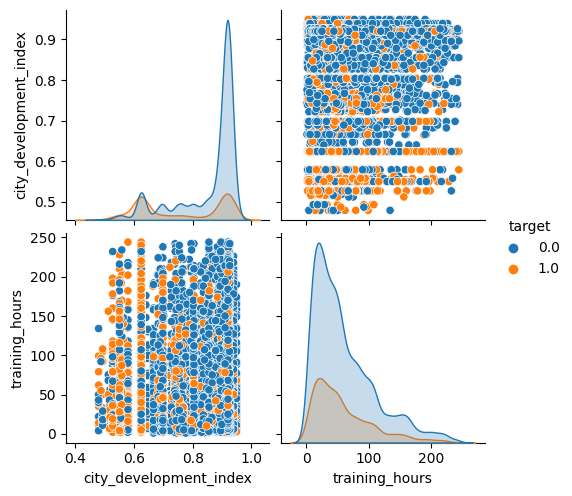

In [14]:
sns.pairplot(df_numerical, hue='target')

### CONVERSION OF CATEGORICAL VARIABLES

In [15]:
#conversion of categorical variables
dummies = pd.get_dummies(df_categorical, drop_first = True)
dummies.tail()

,city_city_10,city_city_100,city_city_101,city_city_102,city_city_103,city_city_104,city_city_105,city_city_106,city_city_107,city_city_109,...,experience_7,experience_8,experience_9,experience_<1,experience_>20,last_new_job_2,last_new_job_3,last_new_job_4,last_new_job_>4,last_new_job_never
19153,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
19154,False,False,False,False,True,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
19155,False,False,False,False,True,False,False,False,False,False,...,False,False,False,False,True,False,False,True,False,False
19156,False,False,False,False,False,False,False,False,False,False,...,False,False,False,True,False,True,False,False,False,False
19157,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


### STANDARDIZATION

<Axes: >

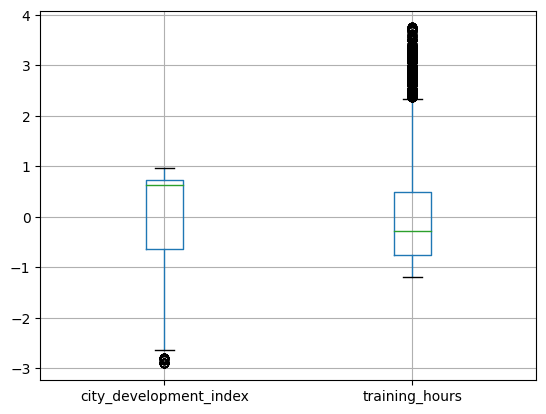

In [16]:
from sklearn.preprocessing import StandardScaler
df_to_scale = df_numerical[['city_development_index', 'training_hours']]
scaler = StandardScaler().fit(df_to_scale)
scaled_df = pd.DataFrame(scaler.transform(df_to_scale))
scaled_df.columns = df_to_scale.columns
scaled_df.boxplot()

In [17]:
dummies.reset_index(drop=True, inplace=True)
X_numerical = scaled_df
X_numerical.reset_index(drop=True, inplace=True)
print(X_numerical.shape)
print(dummies.shape)

(17575, 2)
(17575, 154)


In [18]:
X = pd.concat([dummies, X_numerical], axis = 1)
X

,city_city_10,city_city_100,city_city_101,city_city_102,city_city_103,city_city_104,city_city_105,city_city_106,city_city_107,city_city_109,...,experience_9,experience_<1,experience_>20,last_new_job_2,last_new_job_3,last_new_job_4,last_new_job_>4,last_new_job_never,city_development_index,training_hours
0,False,False,False,False,True,False,False,False,False,False,...,False,False,True,False,False,False,False,False,0.722307,-0.487234
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,True,False,-0.462121,-0.262845
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,-1.712351,0.471517
3,False,False,False,False,False,False,False,False,False,False,...,False,False,True,False,False,True,False,False,-0.536148,-1.058405
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,-0.560823,-0.732022
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17570,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,0.376849,-0.364840
17571,False,False,False,False,True,False,False,False,False,False,...,False,False,False,False,False,True,False,False,0.722307,-0.160851
17572,False,False,False,False,True,False,False,False,False,False,...,False,False,True,False,False,True,False,False,0.722307,-0.324042
17573,False,False,False,False,False,False,False,False,False,False,...,False,True,False,True,False,False,False,False,-0.248266,0.757103


In [19]:
y = df['target']
y

0        1.0
1        0.0
2        0.0
4        0.0
5        1.0
        ... 
19153    1.0
19154    1.0
19155    0.0
19156    0.0
19157    0.0
Name: target, Length: 17575, dtype: float64

### CHECK IMBALANCE

target
0.0    13252
1.0     4323
dtype: int64


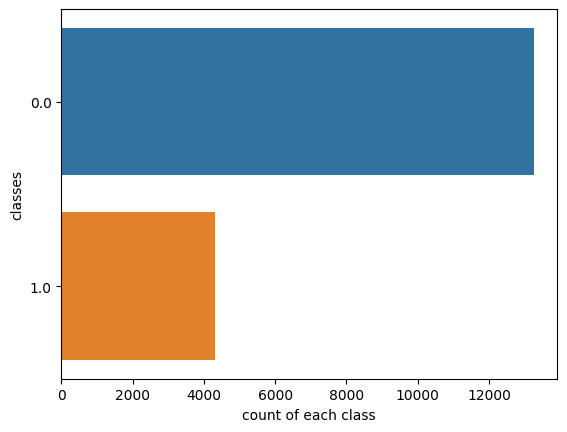

In [20]:
X.reset_index(drop=True, inplace=True)
y.reset_index(drop=True, inplace=True)
print(pd.concat([X,y], axis=1).groupby('target').size())
sns.countplot(y=pd.concat([X,y], axis=1).target, data = pd.concat([X,y], axis=1))
plt.xlabel("count of each class")
plt.ylabel("classes")
plt.show()

In [22]:
size_group_0 = len(pd.concat([X,y], axis=1).groupby('target').get_group(0))
size_group_1 = len(pd.concat([X,y], axis=1).groupby('target').get_group(1))
print(size_group_0)
print(size_group_1)

13252
4323


### Downsampling

In [23]:
from sklearn.utils import resample
df_majority = pd.concat([X,y], axis = 1)[pd.concat([X,y], axis = 1).target==0]
df_minority = pd.concat([X,y], axis = 1)[pd.concat([X,y], axis = 1).target==1]

#downsample majority class
df_majority_downsampled = resample(df_majority,
                                   replace=False,
                                   n_samples = size_group_1,
                                   random_state = 123)

Xy_train = pd.concat([df_majority_downsampled, df_minority])
X_downsampled = Xy_train.drop(columns =['target'])
X_downsampled
y_downsampled = Xy_train['target']
y_downsampled

12594    0.0
11319    0.0
10617    0.0
12358    0.0
7833     0.0
        ... 
17564    1.0
17565    1.0
17566    1.0
17570    1.0
17571    1.0
Name: target, Length: 8646, dtype: float64

### SEPARATE TRAIN/TEST

In [24]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_downsampled, y_downsampled, test_size = 0.30, stratify=y_downsampled, random_state = 123)

print(X_train.shape, X_test.shape)
print(y_train.shape, y_test.shape)
X_train.tail()

(6052, 156) (2594, 156)
(6052,) (2594,)


,city_city_10,city_city_100,city_city_101,city_city_102,city_city_103,city_city_104,city_city_105,city_city_106,city_city_107,city_city_109,...,experience_9,experience_<1,experience_>20,last_new_job_2,last_new_job_3,last_new_job_4,last_new_job_>4,last_new_job_never,city_development_index,training_hours
14422,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,True,False,False,-1.712351,-0.936011
8210,False,False,False,False,False,False,False,False,False,False,...,True,False,False,False,False,False,False,False,0.771658,-0.915612
7927,False,False,False,False,True,False,False,False,False,False,...,False,False,True,False,False,False,True,False,0.722307,-0.997208
9066,False,False,False,False,True,False,False,False,False,False,...,False,True,False,True,False,False,False,False,0.722307,-0.099654
12636,False,False,False,False,False,False,False,False,False,False,...,False,False,True,False,False,False,True,False,0.640055,-0.242446


### MULTI-LAYER PERCEPTRON CLASSIFIER

In [25]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report, f1_score
from sklearn import metrics
from sklearn.neural_network import MLPClassifier

In [26]:
classifier = MLPClassifier()
parameters = {"hidden_layer_sizes":[(10,5), (100,20,5)], "max_iter": [200, 500, 1000, 2000], "alpha": [0.001, 0.01, 0.1], "learning_rate_init": [0.005, 0.001, 0.01, 0.002]}
gs = GridSearchCV(classifier, parameters, cv = 3, scoring = 'f1', verbose = 50, n_jobs = -1, refit = True)

In [31]:
gs = gs.fit(X_train, y_train)

Fitting 3 folds for each of 96 candidates, totalling 288 fits


In [32]:
gs.best_estimator_

MLPClassifier(alpha=0.1, hidden_layer_sizes=(10, 5), max_iter=1000)

In [33]:
print("Best score: %f using %s" % (gs.best_score_, gs.best_params_))
means = gs.cv_results_['mean_test_score']
stds = gs.cv_results_['std_test_score']
params = gs.cv_results_['params']

for mean,stdev, param in zip(means, stds, params):
    print("%f (%f) with %r \n" % (mean, stdev, params))

Best score: 0.670954 using {'alpha': 0.1, 'hidden_layer_sizes': (10, 5), 'learning_rate_init': 0.001, 'max_iter': 1000}
0.661250 (0.017390) with [{'alpha': 0.001, 'hidden_layer_sizes': (10, 5), 'learning_rate_init': 0.005, 'max_iter': 200}, {'alpha': 0.001, 'hidden_layer_sizes': (10, 5), 'learning_rate_init': 0.005, 'max_iter': 500}, {'alpha': 0.001, 'hidden_layer_sizes': (10, 5), 'learning_rate_init': 0.005, 'max_iter': 1000}, {'alpha': 0.001, 'hidden_layer_sizes': (10, 5), 'learning_rate_init': 0.005, 'max_iter': 2000}, {'alpha': 0.001, 'hidden_layer_sizes': (10, 5), 'learning_rate_init': 0.001, 'max_iter': 200}, {'alpha': 0.001, 'hidden_layer_sizes': (10, 5), 'learning_rate_init': 0.001, 'max_iter': 500}, {'alpha': 0.001, 'hidden_layer_sizes': (10, 5), 'learning_rate_init': 0.001, 'max_iter': 1000}, {'alpha': 0.001, 'hidden_layer_sizes': (10, 5), 'learning_rate_init': 0.001, 'max_iter': 2000}, {'alpha': 0.001, 'hidden_layer_sizes': (10, 5), 'learning_rate_init': 0.01, 'max_iter': 20

In [34]:
model = MLPClassifier(hidden_layer_sizes = gs.cv_results_['params'][0]['hidden_layer_sizes'], 
                      activation = 'relu', alpha = gs.cv_results_['params'][0]['alpha'], batch_size = 'auto',
                      learning_rate = 'constant', learning_rate_init = gs.cv_results_['params'][0]['learning_rate_init'],
                      max_iter = gs.cv_results_['params'][0]['max_iter'], solver = 'lbfgs', tol = 0.01,
                      validation_fraction = 0.02, verbose = True)

In [46]:
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
while f1_score(y_test,y_pred)<0.66:
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
print('f1_score:', f1_score(y_test, y_pred))

f1_score: 0.66798575385833


In [64]:
# Predict probabilities for each class
probabilities = model.predict_proba(X_test)
probabilities

array([[0.59883428, 0.40116572],
       [0.17227288, 0.82772712],
       [0.61196036, 0.38803964],
       ...,
       [0.21167649, 0.78832351],
       [0.39170551, 0.60829449],
       [0.87058516, 0.12941484]])

In [73]:
#Classification Report
target_names = ['0','1']
report = classification_report(y_test, y_pred, target_names=target_names)
print(report)

              precision    recall  f1-score   support

           0       0.67      0.70      0.68      1297
           1       0.69      0.65      0.67      1297

    accuracy                           0.68      2594
   macro avg       0.68      0.68      0.68      2594
weighted avg       0.68      0.68      0.68      2594



<Axes: >

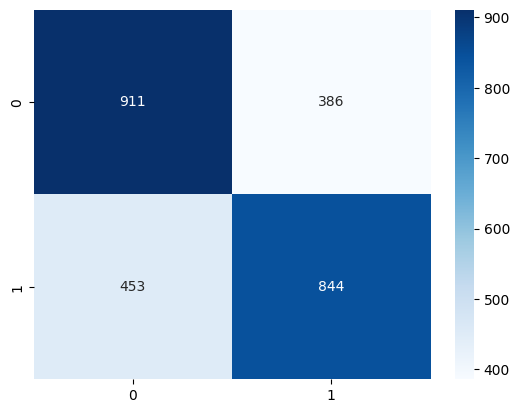

In [47]:
sns.heatmap(confusion_matrix(y_test, y_pred), annot = True, fmt = 'd', cmap = "Blues")

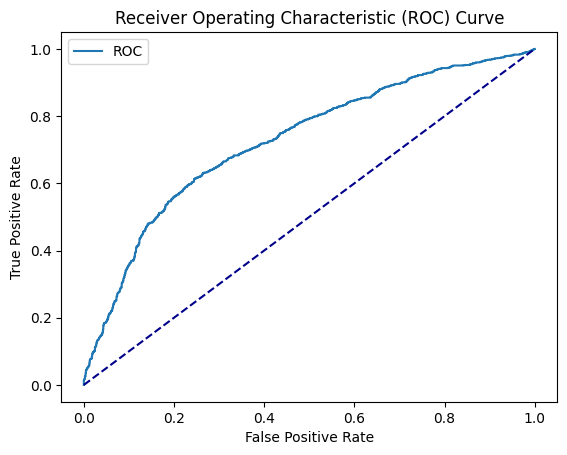

AUC: 0.73


In [48]:
# ROC CURVE
y_probs = model.predict_proba(X_test)
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_probs[:,1])

plt.plot(fpr, tpr, label='ROC')
plt.plot([0,1], [0,1], color = 'darkblue', linestyle = '--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()
auc = metrics.roc_auc_score(y_test, y_probs[:,1])
print('AUC: %.2f' % auc)

### Feature Visualization and Model Interpretation

In [49]:
from sklearn.inspection import permutation_importance

feature_names = ['feature_' + str(i) for i in range(X.shape[1])]
perm_importance = permutation_importance(model, X_test, y_test, n_repeats = 30, random_state = 123)
sorted_idx = perm_importance.importances_mean.argsort()

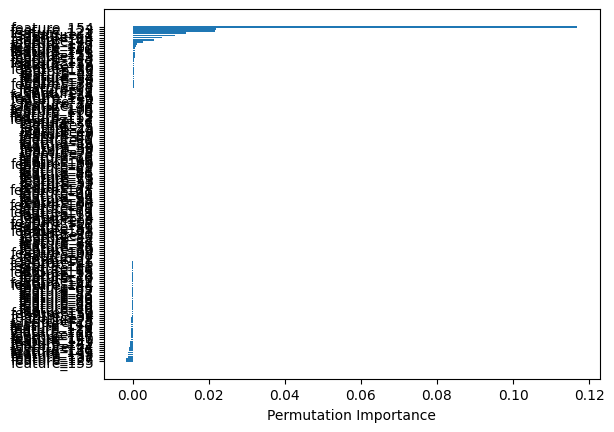

In [50]:
plt.barh(range(X_test.shape[1]), perm_importance.importances_mean[sorted_idx])
plt.yticks(range(X_test.shape[1]), [feature_names[i] for i in sorted_idx])
plt.xlabel('Permutation Importance')
plt.rcParams["figure.figsize"] = (10,30)
plt.show()

In [51]:
features = [feature_names[i] for i in sorted_idx]
most_important_features = []
for i in range(len(sorted_idx)):
    if i in range(0,5) or i in range(len(sorted_idx)-5, len(sorted_idx)):
        most_important_features.append(features[i])
most_important_features

['feature_155',
 'feature_125',
 'feature_137',
 'feature_132',
 'feature_133',
 'feature_63',
 'feature_4',
 'feature_121',
 'feature_123',
 'feature_154']

In [52]:
indexes = []
for i in range (len(most_important_features)):
    indexes.append(int(most_important_features[i].replace('feature_', '')))
indexes

[155, 125, 137, 132, 133, 63, 4, 121, 123, 154]

In [54]:
#these are the most important features for the algorithm!

X_test.iloc[:,indexes]

,training_hours,education_level_Masters,experience_19,experience_14,experience_15,city_city_21,city_city_103,relevent_experience_No relevent experience,enrolled_university_no_enrollment,city_development_index
1502,0.471517,False,False,False,False,False,False,False,True,0.722307
2533,-0.528032,False,False,False,False,True,False,True,True,-1.712351
14197,0.512315,True,False,False,False,False,True,False,True,0.722307
15685,0.389921,False,False,False,False,True,False,False,True,-1.712351
5231,-0.691224,True,False,False,False,False,True,True,False,0.722307
...,...,...,...,...,...,...,...,...,...,...
17366,-0.466835,False,False,False,False,False,False,True,False,-2.255214
15079,0.247129,False,False,False,True,False,False,False,True,-0.643075
3903,-0.609628,True,False,False,False,True,False,False,True,-1.712351
11686,-0.242446,False,False,False,False,False,False,True,False,0.031391


In [63]:
corrmat = X.corr()
top_corr_features = corrmat.index
plt.figure(figsize = (20,20))

#g = sns.heatmap(X[top_corr_features].corr(), annot=True, cmap = "RdYlGn")
corrmat

,city_city_10,city_city_100,city_city_101,city_city_102,city_city_103,city_city_104,city_city_105,city_city_106,city_city_107,city_city_109,...,experience_9,experience_<1,experience_>20,last_new_job_2,last_new_job_3,last_new_job_4,last_new_job_>4,last_new_job_never,city_development_index,training_hours
city_city_10,1.000000,-0.008289,-0.004146,-0.008642,-0.037588,-0.008642,-0.004272,-0.001540,-0.001257,-0.001452,...,0.002961,-0.010917,0.007971,0.005355,-0.005367,0.005314,0.012054,-0.017564,0.035157,-0.000680
city_city_100,-0.008289,1.000000,-0.007422,-0.015472,-0.067292,-0.015472,-0.007648,-0.002757,-0.002251,-0.002600,...,0.001323,-0.007421,0.014132,-0.008142,-0.000292,0.005318,-0.003714,0.024425,0.054926,0.013174
city_city_101,-0.004146,-0.007422,1.000000,-0.007738,-0.033656,-0.007738,-0.003825,-0.001379,-0.001126,-0.001300,...,-0.001621,0.002211,-0.028301,-0.010777,-0.014702,-0.010781,-0.013779,0.003201,-0.137405,0.012552
city_city_102,-0.008642,-0.015472,-0.007738,1.000000,-0.070158,-0.016131,-0.007974,-0.002875,-0.002347,-0.002710,...,-0.001077,-0.005823,-0.008952,-0.005872,-0.004693,0.000687,-0.012994,-0.002573,-0.029442,0.008915
city_city_103,-0.037588,-0.067292,-0.033656,-0.070158,1.000000,-0.070158,-0.034680,-0.012504,-0.010208,-0.011788,...,-0.022950,-0.037909,0.145596,0.019454,0.017049,0.031824,0.080822,-0.094894,0.398998,0.015688
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
last_new_job_4,0.005314,0.005318,-0.010781,0.000687,0.031824,0.024426,0.000510,0.005411,-0.004505,-0.005203,...,0.029680,-0.028047,0.023956,-0.105047,-0.058828,1.000000,-0.113839,-0.090585,0.042137,0.004838
last_new_job_>4,0.012054,-0.003714,-0.013779,-0.012994,0.080822,-0.002306,0.001540,-0.010569,0.007440,-0.009965,...,-0.017898,-0.055933,0.342127,-0.201195,-0.112672,-0.113839,1.000000,-0.173496,0.141466,0.001723
last_new_job_never,-0.017564,0.024425,0.003201,-0.002573,-0.094894,-0.015122,-0.009393,-0.000707,0.002567,0.000241,...,-0.023533,0.100844,-0.122868,-0.160097,-0.089657,-0.090585,-0.173496,1.000000,-0.148439,-0.007972
city_development_index,0.035157,0.054926,-0.137405,-0.029442,0.398998,0.095917,-0.019718,-0.024982,-0.047756,-0.023026,...,0.003449,-0.119447,0.233918,0.022321,0.027580,0.042137,0.141466,-0.148439,1.000000,0.007765


<Figure size 2000x2000 with 0 Axes>